# Title: AIDI 1002 Final Term Project Report

#### Names: Nelson Ojeaburu and Ajiharan Kanthasamy

#### Emails: 200571498@student.georgianc.on.ca and 200575831@student.georgianc.on.ca

# Introduction:

The project aims to address the challenge of diagnosing liver disease using machine learning techniques. Leveraging a dataset containing various medical features, the objective is to develop predictive models that can accurately classify individuals into categories of having or not having liver disease. This project encompasses the entire machine learning pipeline, including data preprocessing, model training, and performance evaluation.

#### Problem Description:

Liver disease is a critical health issue globally, and early and accurate diagnosis is essential for effective medical intervention. The challenge is to build robust predictive models that can analyze patient data and provide reliable predictions about the likelihood of liver disease.

#### Context of the Problem:

Timely detection of liver disease is crucial for improving patient outcomes and reducing healthcare costs. Machine learning models, when trained on relevant medical data, have the potential to enhance the diagnostic process by identifying patterns and relationships in patient features that might not be immediately apparent to healthcare professionals.

#### Limitation About other Approaches:

Traditional diagnostic approaches may rely heavily on manual analysis and may not effectively utilize the wealth of information present in diverse medical datasets. Additionally, rule-based or threshold-based methods may lack the flexibility to capture complex relationships within the data. These limitations highlight the need for advanced machine learning techniques that can handle diverse and intricate patterns in medical data.

#### Solution:

The approach taken in this project involves the application of various machine learning models, including Logistic Regression, Random Forest, XGBoost, K-Nearest Neighbors, Decision Trees, Support Vector Machine, Gradient Boosting, Neural Networks, and AdaBoost. By training and evaluating these models on a comprehensive dataset, the project seeks to identify the most effective algorithm for predicting liver disease. This methodology aims to provide a reliable, automated, and data-driven solution for early detection and classification of liver disease, thereby assisting healthcare professionals in making informed decisions.

# Background

Explain the related work using the following table

| Reference |Explanation |  Dataset/Input |Weakness
| --- | --- | --- | --- |
| Arbain and Balakrishnan [1] | Compared various data mining algorithms for predicting liver disease on imbalanced data| Andhra Pradesh liver disease dataset | High accuracy but poor on unkown answers
| Performance Assessment of Classification Algorithms on Early Detection of Liver Syndrome [2] | This research paper aims to present the performance analysis of ML classification algorithms for liver disease prophecy on two different datasets occupied from GitHub and UCI ML repositories.| Indian liver disease | Different percentage of accuarcy with different models


The last row in this table should be about the method discussed in this paper (If you can't find the weakenss of this method then write about the future improvement, see the future work section of the paper)

# Methodology

The method discussed in this paper focuses on liver disease diagnosis through machine learning techniques. While the specific weaknesses may not be provided, potential areas for future improvement could involve enhancing the model's interpretability, addressing any biases in the dataset, or exploring more advanced feature engineering methods. The paper's future work section may provide insights into areas where the proposed method could be further refined or expanded to achieve even better performance.

# Implementation

In this section, you will provide the code and its explanation. You may have to create more cells after this. (To keep the Notebook clean, do not display debugging output or thousands of print statements from hundreds of epochs. Make sure it is readable by reviewing it carefully.)

In [1]:
# for numerical computing
import numpy as np
# for dataframes
import pandas as pd
# for easier visualization
import seaborn as sns
# for visualization and to display plots
from matplotlib import pyplot as plt
%matplotlib inline
# import color maps
from matplotlib.colors import ListedColormap
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
from math import sqrt
# to split train and test set
from sklearn.model_selection import train_test_split
# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
#import xgboost
import os
from xgboost import XGBClassifier
from xgboost import plot_importance  # to plot feature importance

In [2]:
df=pd.read_csv('cirrhosis.csv')

In [3]:
df.shape

(310, 13)

In [4]:
df.columns

Index(['ID', 'N_Days', 'Sex', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

In [5]:
df.head()

,ID,N_Days,Sex,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,F,14.5,261,2.60,156,1718.0,137.95,172,190,12.2,4
1,2,4500,F,1.1,302,4.14,54,7394.8,113.52,88,221,10.6,3
2,3,1012,M,1.4,176,3.48,210,516.0,96.10,55,151,12.0,4
3,4,1925,F,1.8,244,2.54,64,6121.8,60.63,92,183,10.3,4
4,5,1504,F,3.4,279,3.53,143,671.0,113.15,72,136,10.9,3


## Exploratory Data Analysis

Filtering categorical data

In [6]:
df.dtypes[df.dtypes=='object']

Sex    object
dtype: object

## Distribution of Numerical Features

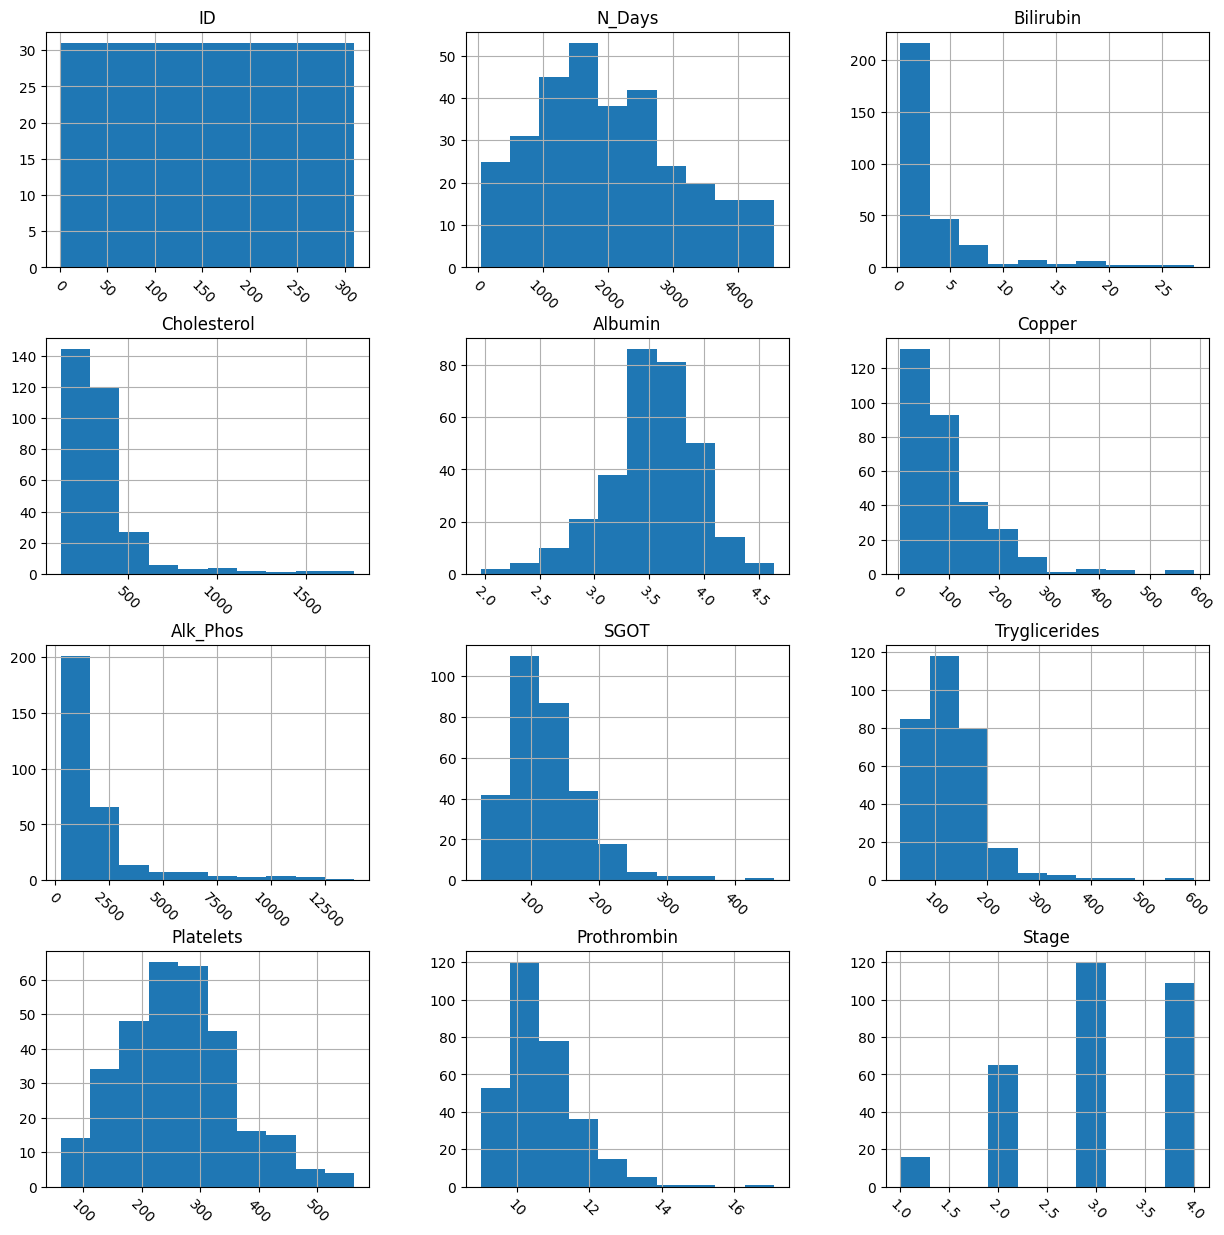

In [7]:
# Plot histogram grid
df.hist(figsize=(15,15), xrot=-45, bins=10) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

In [8]:
df.describe()

,ID,N_Days,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,310.000000,310.000000,310.000000,310.000000,310.00000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,155.500000,2014.058065,3.250000,354.267742,3.52029,98.116129,1985.237419,122.530903,132.029032,261.100000,10.726129,3.038710
std,89.633513,1122.788099,4.540866,226.657139,0.42047,85.845270,2146.634135,56.876697,65.955137,95.399855,1.007477,0.876769
min,1.000000,41.000000,0.300000,120.000000,1.96000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,78.250000,1213.000000,0.800000,233.500000,3.31000,41.250000,862.500000,80.600000,87.000000,200.000000,10.000000,2.000000
50%,155.500000,1860.500000,1.300000,298.000000,3.55000,73.000000,1259.000000,114.110000,114.000000,255.500000,10.600000,3.000000
75%,232.750000,2707.750000,3.400000,391.500000,3.80000,123.750000,1971.250000,151.900000,171.750000,321.750000,11.100000,4.000000
max,310.000000,4556.000000,28.000000,1775.000000,4.64000,588.000000,13862.400000,457.250000,598.000000,563.000000,17.100000,4.000000


It seems there is outlier in Aspartate_Aminotransferase as the max value is very high than mean value

Dataset i.e output value has '1' for liver disease and '2' for no liver disease so let's make it 0 for no disease to make it convinient

In [9]:
## if score==negative, mark 0 ;else 1 
def partition(x):
    if x == 2:
        return 0
    return 1

df['Stage'] = df['Stage'].map(partition)

## Distribution of categorical data

In [10]:
df.describe(include=['object'])

,Sex
count,310
unique,2
top,F
freq,274


## Bar plots for categorical Features

<Axes: xlabel='count', ylabel='Sex'>

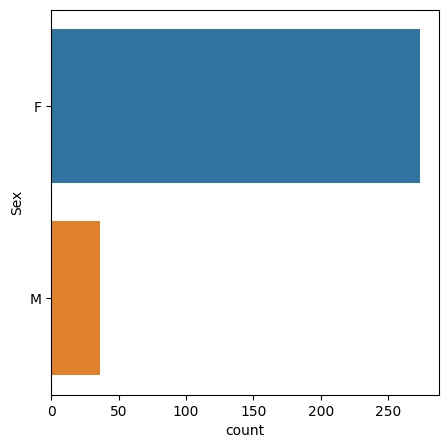

In [11]:
plt.figure(figsize=(5,5))
sns.countplot(y='Sex', data=df)

In [12]:
df[df['Sex'] == 'M'][['Stage', 'Sex']].head()

,Stage,Sex
2,1,M
13,1,M
20,1,M
23,0,M
47,1,M


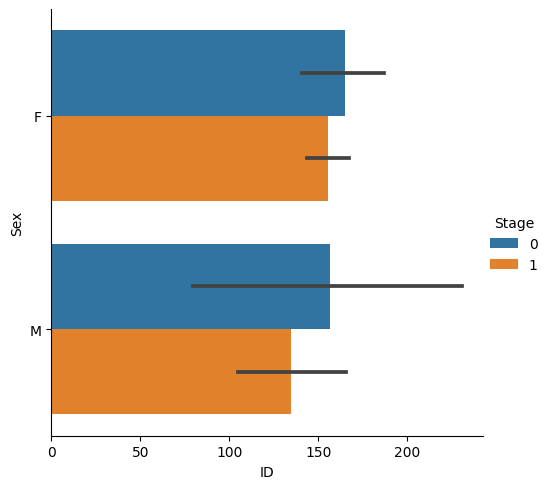

In [13]:
sns.catplot(x="ID", y="Sex", hue="Stage", data=df, kind="bar")

Age seems to be a factor for liver disease for both male and female genders

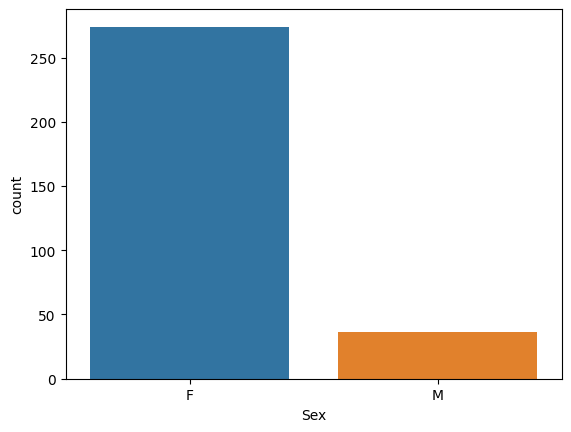

In [14]:
sns.countplot(data=df, x = 'Sex', label='Count')

M, F = df['Sex'].value_counts()

There are more male patients than female patients

Label Male as 0 and Female as 1

In [15]:
## if score==negative, mark 0 ;else 1 
def partition(x):
    if x =='M':
        return 0
    return 1

df['Sex'] = df['Sex'].map(partition)

#### 2-D Scatter Plot

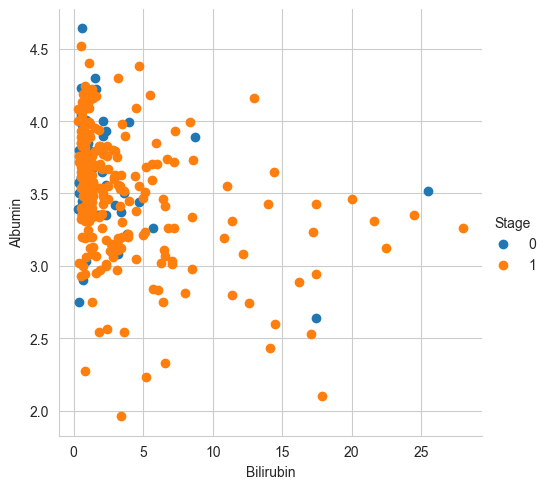

In [16]:
sns.set_style('whitegrid')  # Background Grid

# Using height instead of size in FacetGrid
sns.FacetGrid(df, hue='Stage', height=5).map(plt.scatter, 'Bilirubin', 'Albumin').add_legend()

# Show the plot
plt.show()

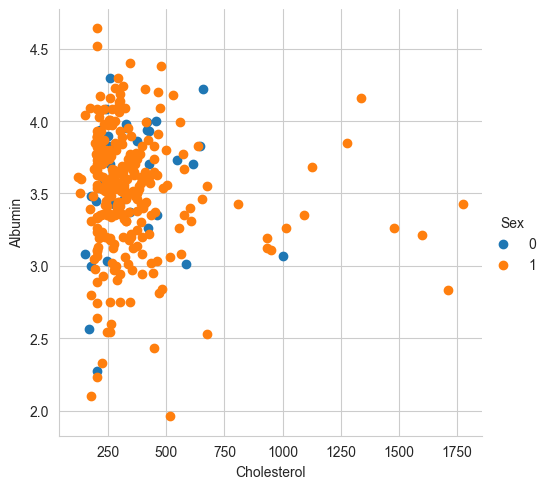

In [17]:
sns.set_style('whitegrid')  # Background Grid

# Using height instead of size in FacetGrid
sns.FacetGrid(df, hue='Sex', height=5).map(plt.scatter, 'Cholesterol', 'Albumin').add_legend()

# Show the plot
plt.show()


## Correlations
* Finally, let's take a look at the relationships between numeric features and other numeric features.
* ***Correlation*** is a value between -1 and 1 that represents how closely values for two separate features move in unison.
* Positive correlation means that as one feature increases, the other increases; eg. a child's age and her height.
* Negative correlation means that as one feature increases, the other decreases; eg. hours spent studying and number of parties attended.
* Correlations near -1 or 1 indicate a strong relationship.
* Those closer to 0 indicate a weak relationship.
* 0 indicates no relationship.

In [18]:
df.corr()

,ID,N_Days,Sex,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,1.000000,-0.386297,0.069421,-0.088414,0.040848,-0.082110,-0.100862,-0.354297,-0.013003,-0.044238,-0.001717,-0.342750,-0.049456
N_Days,-0.386297,1.000000,0.022438,-0.442304,-0.132871,0.437628,-0.366564,0.148610,-0.225839,-0.125038,0.182530,-0.169430,-0.200686
Sex,0.069421,0.022438,1.000000,0.030205,-0.005889,-0.050837,-0.237520,-0.031748,0.003449,-0.017883,0.099856,-0.099694,-0.038298
Bilirubin,-0.088414,-0.442304,0.030205,1.000000,0.372593,-0.337764,0.449090,0.116600,0.441557,0.388119,-0.079935,0.361735,0.134678
Cholesterol,0.040848,-0.132871,-0.005889,0.372593,1.000000,-0.065558,0.132355,0.138207,0.344185,0.185442,0.179575,-0.033624,0.035207
Albumin,-0.082110,0.437628,-0.050837,-0.337764,-0.065558,1.000000,-0.272386,-0.103008,-0.221239,-0.093509,0.198382,-0.235242,-0.137444
Copper,-0.100862,-0.366564,-0.237520,0.449090,0.132355,-0.272386,1.000000,0.183585,0.295247,0.218931,-0.058647,0.214708,0.179605
Alk_Phos,-0.354297,0.148610,-0.031748,0.116600,0.138207,-0.103008,0.183585,1.000000,0.112080,0.152505,0.143164,0.089090,0.038722
SGOT,-0.013003,-0.225839,0.003449,0.441557,0.344185,-0.221239,0.295247,0.112080,1.000000,0.092952,-0.111833,0.112069,0.066262
Tryglicerides,-0.044238,-0.125038,-0.017883,0.388119,0.185442,-0.093509,0.218931,0.152505,0.092952,1.000000,0.095682,0.018340,0.080374


<Axes: >

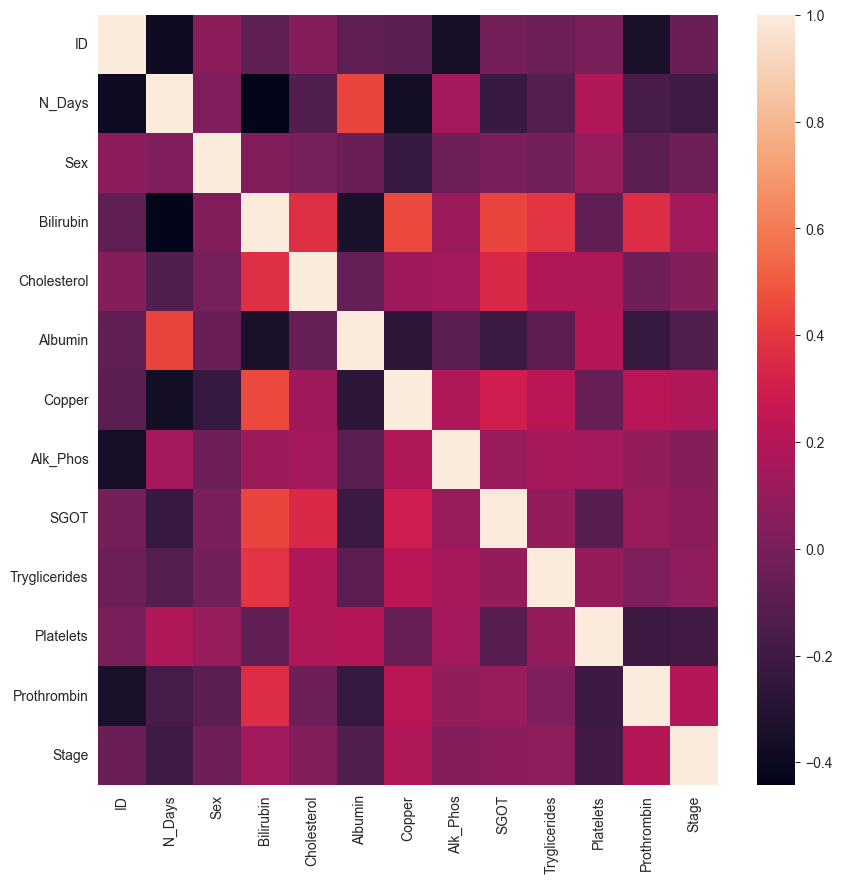

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

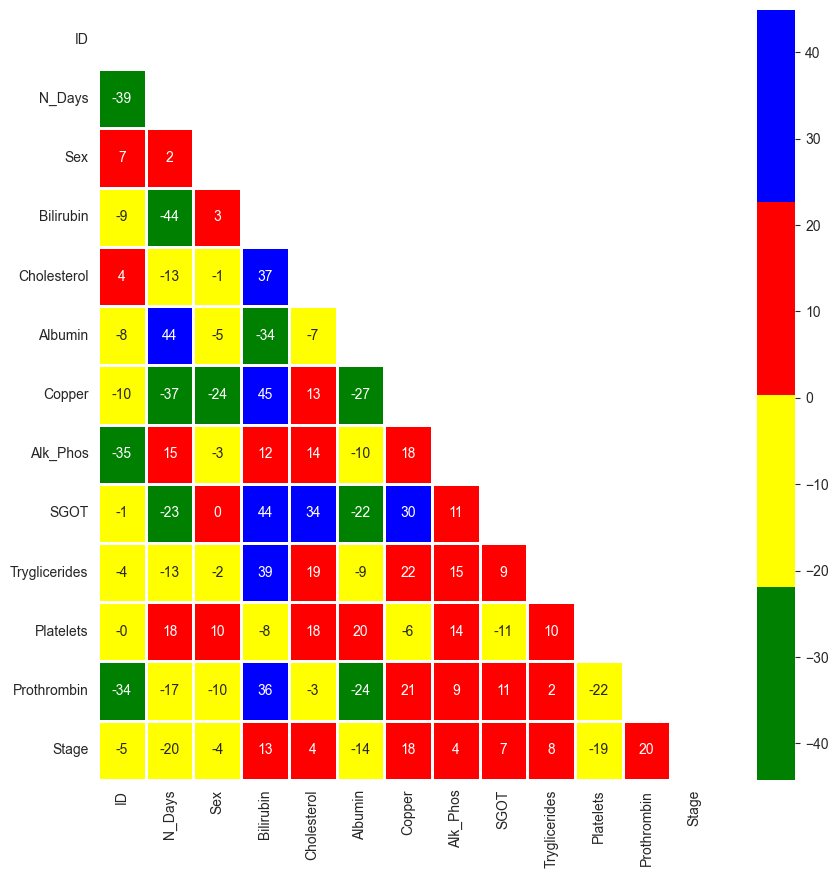

In [20]:
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr()*100, mask=mask, fmt='.0f', annot=True, lw=1, cmap=ListedColormap(['green', 'yellow', 'red','blue']))

## Data Cleaning

In [21]:
df = df.drop_duplicates()
print( df.shape )

(310, 13)


There were 13 duplicates

## Removing Outliers

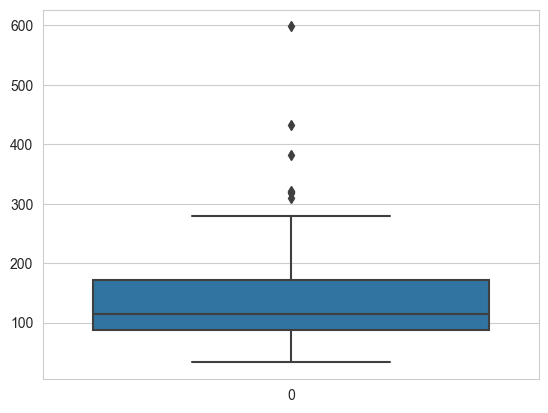

In [22]:
# Assuming df is your DataFrame
sns.boxplot(df['Tryglicerides'])

# Show the plot
plt.show()

In [23]:
df.Tryglicerides.sort_values(ascending=False).head()

74     598
190    432
115    382
240    322
55     319
Name: Tryglicerides, dtype: int64

In [24]:
df = df[df.Tryglicerides <=3000 ]
df.shape

(310, 13)

<Axes: >

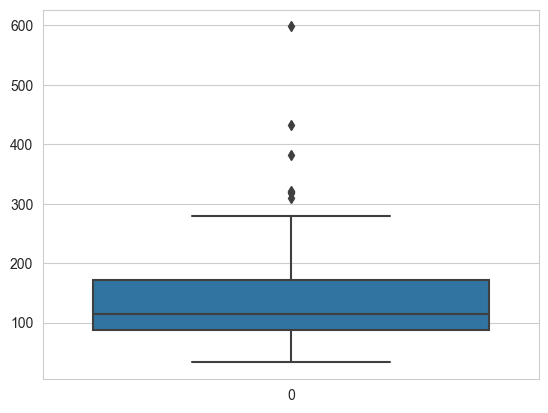

In [25]:
sns.boxplot(df.Tryglicerides)

In [26]:
df.Tryglicerides.sort_values(ascending=False).head()

74     598
190    432
115    382
240    322
55     319
Name: Tryglicerides, dtype: int64

In [27]:
df = df[df.Tryglicerides <=2500 ]
df.shape

(310, 13)

In [28]:
df.isnull().values.any()

False

In [29]:
df=df.dropna(how='any')  

In [30]:
df.shape

(310, 13)

In [31]:
df.head()

,ID,N_Days,Sex,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,1,14.5,261,2.60,156,1718.0,137.95,172,190,12.2,1
1,2,4500,1,1.1,302,4.14,54,7394.8,113.52,88,221,10.6,1
2,3,1012,0,1.4,176,3.48,210,516.0,96.10,55,151,12.0,1
3,4,1925,1,1.8,244,2.54,64,6121.8,60.63,92,183,10.3,1
4,5,1504,1,3.4,279,3.53,143,671.0,113.15,72,136,10.9,1


## Machine Learning Models

### Data Preparation

In [32]:
# Create separate object for target variable
y = df.Stage

# Create separate object for input features
X = df.drop('Stage', axis=1)

In [33]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1234,
                                                    stratify=df.Stage)



In [34]:
# Print number of observations in X_train, X_test, y_train, and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(248, 12) (62, 12) (248,) (62,)


### Data standardization
* In Data Standardization we perform zero mean centring and unit scaling; i.e. we make the mean of all the features as zero and the standard deviation as 1.
* Thus we use **mean** and **standard deviation** of each feature.
* It is very important to save the **mean** and **standard deviation** for each of the feature from the **training set**, because we use the same mean and standard deviation in the test set.

In [35]:
train_mean = X_train.mean()
train_std = X_train.std()

In [36]:
## Standardize the train data set
X_train = (X_train - train_mean) / train_std

In [37]:
## Check for mean and std dev.
X_train.describe()

,ID,N_Days,Sex,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
count,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02
mean,6.804593e-17,7.431332e-17,-7.162729e-18,-1.074409e-17,3.760433e-17,-5.461581e-17,5.013910e-17,-3.581365e-18,-1.826496e-16,1.146037e-16,1.826496e-16,1.729799e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.678173e+00,-1.756717e+00,-2.640412e+00,-6.414785e-01,-1.015869e+00,-3.502655e+00,-1.092917e+00,-8.027476e-01,-1.634972e+00,-1.543400e+00,-2.101170e+00,-1.727331e+00
25%,-8.917048e-01,-7.367435e-01,3.772017e-01,-5.321706e-01,-5.355152e-01,-5.312455e-01,-6.541438e-01,-5.211708e-01,-7.200053e-01,-7.120705e-01,-6.524141e-01,-7.479574e-01
50%,2.629811e-02,-1.399506e-01,3.772017e-01,-4.228628e-01,-2.553974e-01,8.268219e-02,-2.746639e-01,-3.425462e-01,-1.956793e-01,-2.644318e-01,-6.976242e-02,-1.603330e-01
75%,8.730531e-01,6.439098e-01,3.772017e-01,5.809184e-02,1.440100e-01,6.720527e-01,2.945560e-01,1.181495e-03,4.640687e-01,6.628200e-01,5.680050e-01,4.272914e-01
max,1.697886e+00,2.162585e+00,3.772017e-01,5.414177e+00,6.035003e+00,2.734850e+00,5.832591e+00,5.636940e+00,5.846223e+00,4.835453e+00,3.158443e+00,6.205598e+00


In [38]:
## Note: We use train_mean and train_std_dev to standardize test data set
X_test = (X_test - train_mean) / train_std

In [39]:
## Check for mean and std dev. - not exactly 0 and 1
X_test.describe()

,ID,N_Days,Sex,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.021878,-0.219896,0.133846,0.017190,-0.089038,-0.074166,0.115910,0.010029,0.174505,0.198936,-0.054862,-0.184028
std,0.916622,0.850593,0.828372,0.970831,0.817190,1.160640,1.090711,1.097644,0.930374,1.245260,1.014620,0.924652
min,-1.689134,-1.696821,-2.640412,-0.619617,-0.986047,-3.846455,-0.974330,-0.760997,-1.231310,-1.063787,-2.006686,-1.335582
25%,-0.598492,-0.753888,0.377202,-0.510309,-0.515279,-0.727702,-0.556309,-0.581424,-0.596086,-0.456277,-0.757396,-0.919348
50%,-0.088795,-0.252365,0.377202,-0.411932,-0.289480,0.021289,-0.262805,-0.339700,0.116138,-0.136535,-0.075012,-0.454145
75%,0.807286,0.401937,0.377202,0.025299,0.069454,0.629078,0.508013,-0.039620,0.867730,0.750749,0.785843,0.231417
max,1.577312,2.073175,0.377202,3.096850,4.164711,2.440164,5.476828,4.876137,3.612629,7.489311,2.150613,2.777789


##  Model-1 Logistic Regression

In [40]:
tuned_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'penalty': ['l1', 'l2']}
model = GridSearchCV(LogisticRegression(), tuned_params, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [41]:
model.best_estimator_

LogisticRegression(C=0.0001)

In [42]:
## Predict Train set results
y_train_pred = model.predict(X_train)

In [43]:
## Predict Test set results
y_pred = model.predict(X_test)

In [44]:
# Get just the prediction for the positive class (1)
y_pred_proba = model.predict_proba(X_test)[:,1]

In [45]:
# Display first 10 predictions
y_pred_proba[:10]

array([0.7926247 , 0.79093441, 0.78893722, 0.79320893, 0.78978403,
       0.78984329, 0.78883818, 0.78983769, 0.79072619, 0.78939607])

In [46]:
i=28  ## Change the value of i to get the details of any point (56, 213, etc.)
print('For test point {}, actual class = {}, precited class = {}, predicted probability = {}'.
      format(i, y_test.iloc[i], y_pred[i], y_pred_proba[i]))

For test point 28, actual class = 0, precited class = 1, predicted probability = 0.789577101921518


In [47]:
confusion_matrix(y_test, y_pred).T

array([[ 0,  0],
       [13, 49]], dtype=int64)

In [48]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

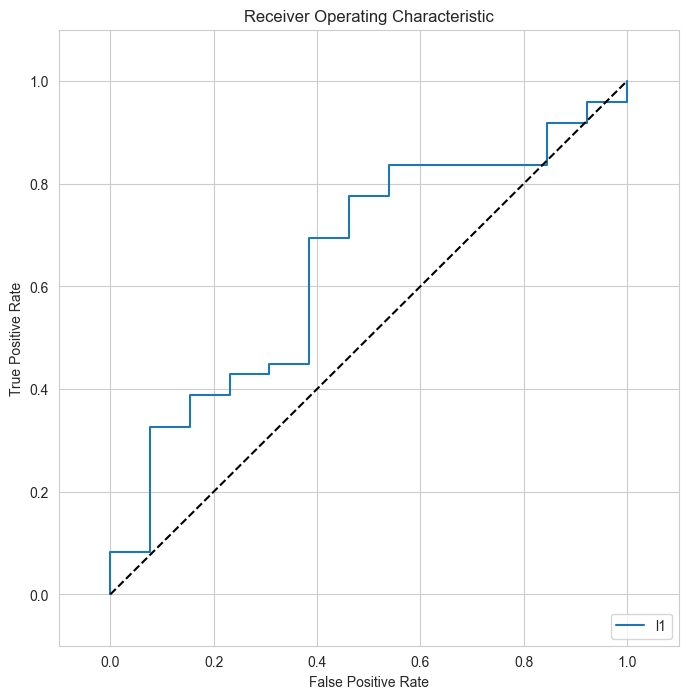

In [49]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [50]:
# Calculate AUC for Train set
print(roc_auc_score(y_train, y_train_pred))

0.5


In [51]:
# Calculate AUC for Test set
print(auc(fpr, tpr))

0.6436420722135008


#### Feature Importance

In [52]:
## Building the model again with the best hyperparameters
model = LogisticRegression(C=1, penalty = 'l2')
model.fit(X_train, y_train)

LogisticRegression(C=1)

In [53]:
indices = np.argsort(-abs(model.coef_[0,:]))
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
N_Days
Prothrombin
ID
Platelets
Copper
Tryglicerides
Albumin
SGOT
Sex
Alk_Phos
Cholesterol
Bilirubin


## Model-2 Random Forest

In [54]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
model = RandomizedSearchCV(RandomForestClassifier(), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='roc_auc')

In [55]:
model.best_estimator_

RandomForestClassifier(n_estimators=300)

In [56]:
y_train_pred = model.predict(X_train)

In [57]:
y_pred = model.predict(X_test)

In [58]:
# Get just the prediction for the positive class (1)
y_pred_proba = model.predict_proba(X_test)[:,1]

In [59]:
# Display first 10 predictions
y_pred_proba[:10]

array([0.95      , 0.97      , 0.50333333, 0.97      , 0.67333333,
       0.73333333, 0.59333333, 0.86      , 0.82666667, 0.59333333])

In [60]:
confusion_matrix(y_test, y_pred).T

array([[ 0,  0],
       [13, 49]], dtype=int64)

In [61]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

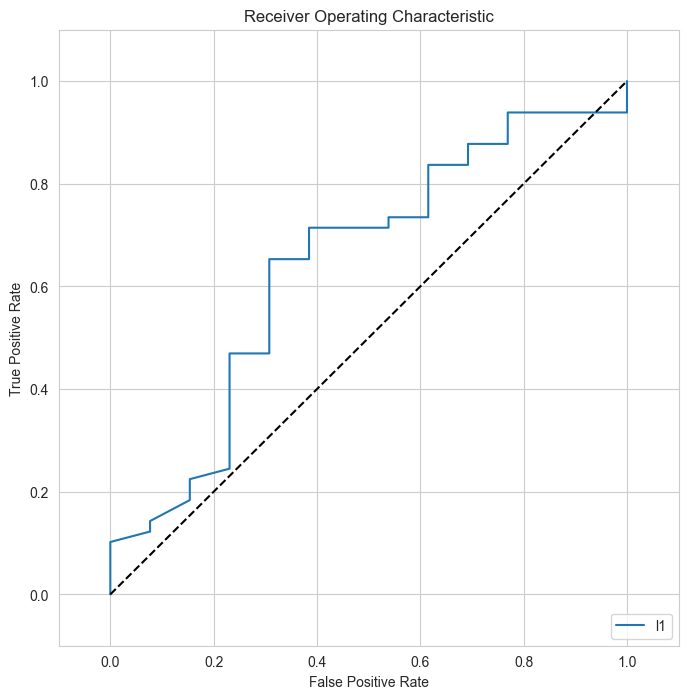

In [62]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [63]:
# Calculate AUC for Train set
roc_auc_score(y_train, y_train_pred)

1.0

In [64]:
# Calculate AUC for Test set
print(auc(fpr, tpr))

0.6405023547880689


#### Feature Importance

In [65]:
## Building the model again with the best hyperparameters
model = RandomForestClassifier(n_estimators=500, min_samples_split=2, min_samples_leaf=4)
model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=4, n_estimators=500)

In [66]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
N_Days
Platelets
ID
Prothrombin
Bilirubin
Copper
Cholesterol
Tryglicerides
Albumin
SGOT
Alk_Phos
Sex


## Model-3 XGBoost

In [67]:
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBClassifier(), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [1, 2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'reg_lambda': [0.001, 0.1, 1.0, 10.0,
                                                       100.0]},
                   scoring='roc_auc')

In [68]:
model.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [69]:
y_train_pred = model.predict(X_train)

In [70]:
y_pred = model.predict(X_test)

In [71]:
# Get just the prediction for the positive class (1)
y_pred_proba = model.predict_proba(X_test)[:,1]

In [72]:
# Display first 10 predictions
y_pred_proba[:10]

array([0.893271  , 0.8772394 , 0.6419148 , 0.9048931 , 0.66807   ,
       0.7168714 , 0.48954293, 0.82920635, 0.8825321 , 0.6626118 ],
      dtype=float32)

**Note:** Just as above we can use these probabilities to get model interpretation

In [73]:
confusion_matrix(y_test, y_pred).T

array([[ 1,  0],
       [12, 49]], dtype=int64)

In [74]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

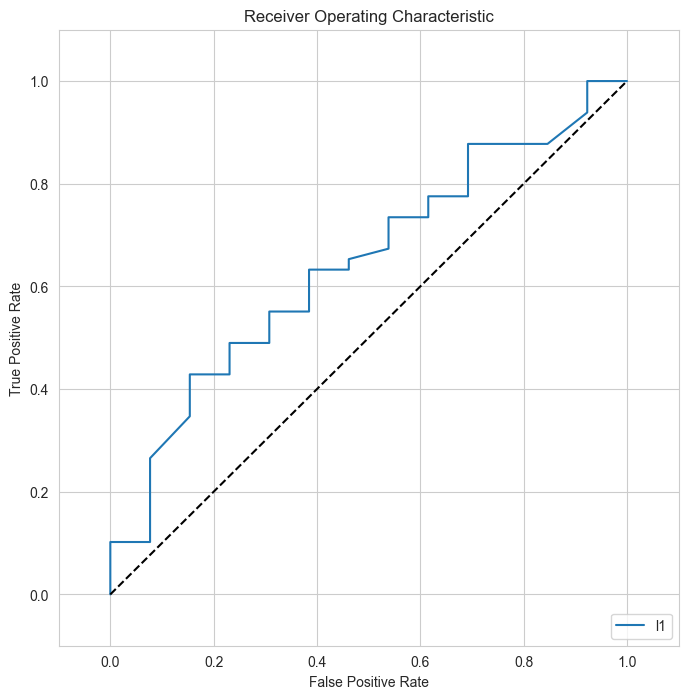

In [75]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [76]:
# Calculate AUC for Train
roc_auc_score(y_train, y_train_pred)

0.6153846153846154

In [77]:
# Calculate AUC for Test
print(auc(fpr, tpr))

0.6420722135007849


#### Feature Importance

In [78]:
model = XGBClassifier(max_depth=1,learning_rate=0.05,n_estimators=500, reg_lambda=1)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [79]:
def my_plot_importance(booster, figsize, **kwargs): 
    from matplotlib import pyplot as plt
    from xgboost import plot_importance
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax, **kwargs)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

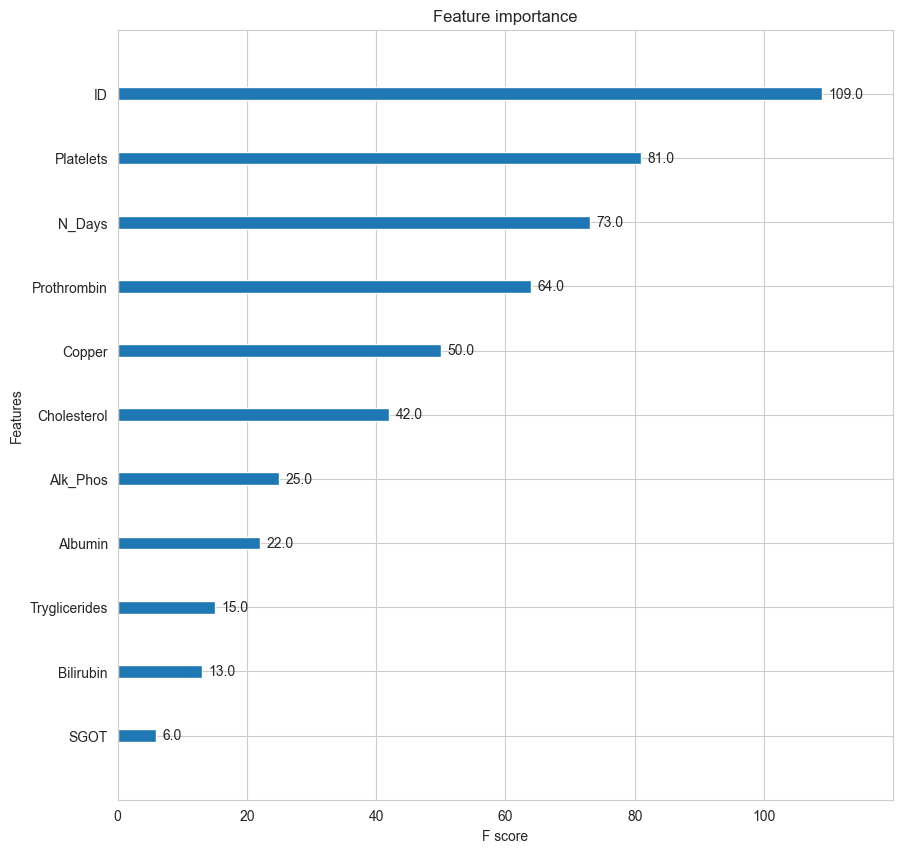

In [80]:
my_plot_importance(model, (10,10))

## Model-4 KNN

In [81]:
# creating odd list of K for KNN
neighbors = list(range(1,20,2))
# empty list that will hold cv scores
cv_scores = []

#  10-fold cross validation , 9 datapoints will be considered for training and 1 for cross validation (turn by turn) to determine value of k
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())   

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


The optimal number of neighbors is 9.


In [82]:
MSE.index(min(MSE))

4

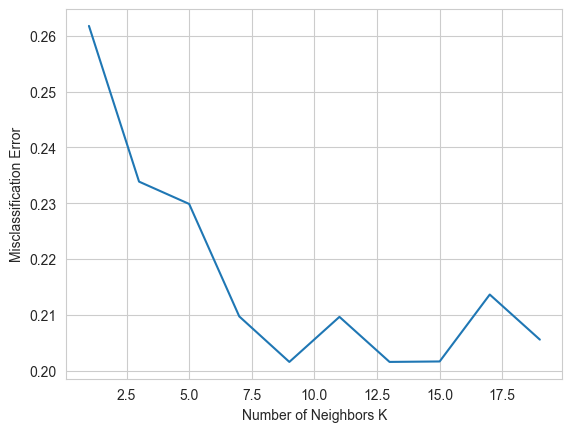

In [83]:
# plot misclassification error vs k 
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [84]:
classifier = KNeighborsClassifier(n_neighbors = optimal_k)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [85]:
y_pred = classifier.predict(X_test)


In [86]:
y_train_pred = classifier.predict(X_train)

In [87]:
acc = accuracy_score(y_test, y_pred, normalize=True) * float(100)  ## get the accuracy on testing data
acc

79.03225806451613

In [88]:
cnf=confusion_matrix(y_test,y_pred).T
cnf

array([[ 1,  1],
       [12, 48]], dtype=int64)

In [89]:
# Get just the prediction for the positive class (1)
y_pred_proba = classifier.predict_proba(X_test)[:,1]

In [90]:
# Display first 10 predictions
y_pred_proba[:10]

array([1.        , 0.77777778, 0.77777778, 1.        , 0.55555556,
       0.77777778, 0.44444444, 1.        , 1.        , 0.88888889])

In [91]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

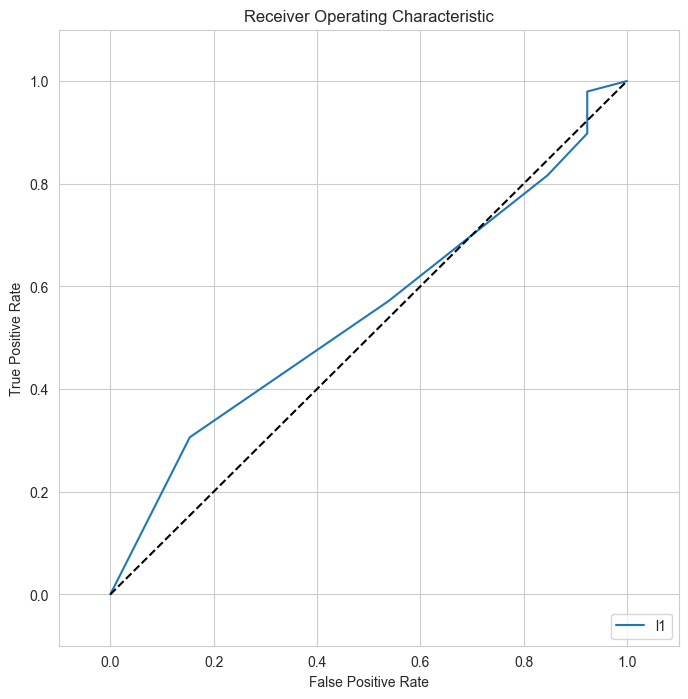

In [92]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [93]:
# Calculate AUC for Train
roc_auc_score(y_train, y_train_pred)

0.5571036106750392

In [94]:
# Calculate AUC for Test
print(auc(fpr, tpr))

0.5478806907378335


## Model-5 Descision Trees

In [95]:
tuned_params = {'min_samples_split': [2, 3, 4, 5, 7], 'min_samples_leaf': [1, 2, 3, 4, 6], 'max_depth': [2, 3, 4, 5, 6, 7]}
model = RandomizedSearchCV(DecisionTreeClassifier(), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 6],
                                        'min_samples_split': [2, 3, 4, 5, 7]},
                   scoring='roc_auc')

In [96]:
model.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=4, min_samples_split=4)

In [97]:
y_train_pred = model.predict(X_train)

In [98]:
y_pred = model.predict(X_test)

In [99]:
y_pred_proba = model.predict_proba(X_test)[:,1]

In [100]:
y_pred_proba[:10]

array([0.92647059, 0.92647059, 0.57954545, 0.92647059, 0.57954545,
       0.57954545, 0.57954545, 0.92647059, 0.92647059, 0.57954545])

In [101]:
confusion_matrix(y_test, y_pred).T

array([[ 0,  0],
       [13, 49]], dtype=int64)

In [102]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

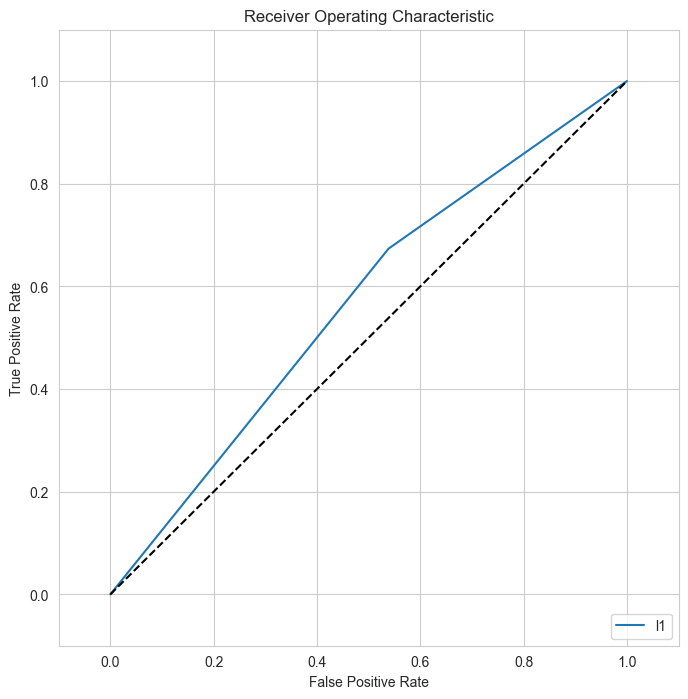

In [103]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [104]:
# Calculate AUC for Train
roc_auc_score(y_train, y_train_pred)

0.5480769230769231

In [105]:
print(auc(fpr, tpr))

0.5675039246467818


#### Feature Importance

In [106]:
## Building the model again with the best hyperparameters
model = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=6, max_depth=4)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=6)

In [107]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Prothrombin
N_Days
ID
Platelets
Bilirubin
Copper
Tryglicerides
Sex
Cholesterol
Albumin
Alk_Phos
SGOT


## Model-6 SVC

In [108]:
from sklearn import svm
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X_train, y_train)
    grid_search.best_params_
    return grid_search.best_params_

In [109]:
svClassifier=SVC(kernel='rbf',probability=True)
svClassifier.fit(X_train,y_train)

SVC(probability=True)

In [110]:
svc_param_selection(X_train,y_train,5)

{'C': 0.001, 'gamma': 0.001}

In [111]:
###### Building the model again with the best hyperparameters
model = SVC(C=1, gamma=1)
model.fit(X_train, y_train)

SVC(C=1, gamma=1)

In [112]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [113]:
## Predict Test results
y_pred = model.predict(X_test)

In [114]:
confusion_matrix(y_test, y_pred).T

array([[ 0,  0],
       [13, 49]], dtype=int64)

In [115]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

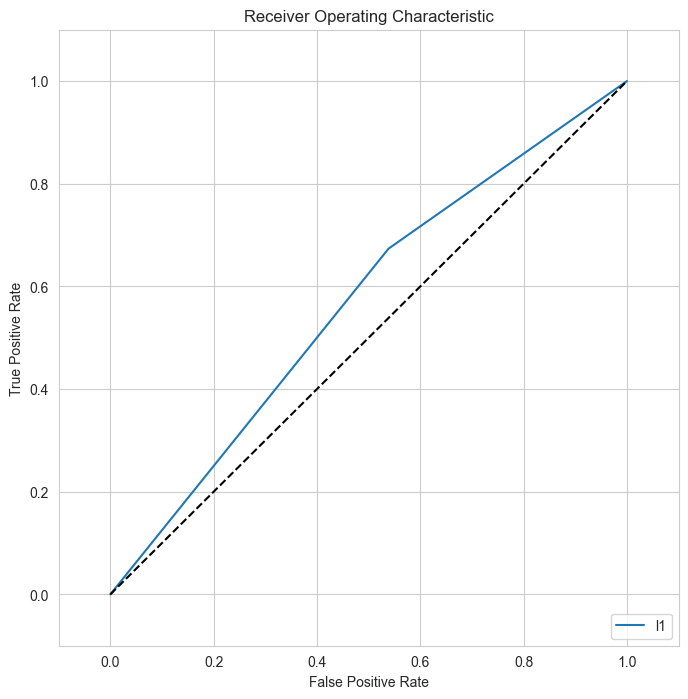

In [116]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [117]:
# Calculate AUC for Train
roc_auc_score(y_train, y_train_pred)

0.9038461538461539

In [118]:
print(auc(fpr, tpr))

0.5675039246467818


## Model-7 Gradient Boosting

In [119]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier

In [120]:
#Import Library
from sklearn.ensemble import GradientBoostingClassifier
# Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create Gradient Boosting Classifier object
gbclass = GradientBoostingClassifier(
                    random_state = 1000,
                    verbose = 0,
                    n_estimators = 10,
                    learning_rate = 0.9,
                    loss = 'deviance',
                    max_depth = 3
                   )
gbclass = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
# Train the model using the training sets and check score
gbclass.fit(X_train, y_train)
#Predict Output
predicted= gbclass.predict(X_test)

gbclass_score = round(gbclass.score(X_train, y_train) * 100, 2)
gbclass_score_test = round(gbclass.score(X_test, y_test) * 100, 2)
print('Score: \n', gbclass_score)
print('Test Score: \n', gbclass_score_test)
print('Accuracy: \n', accuracy_score(y_test,predicted))
print(confusion_matrix(predicted,y_test))
print(classification_report(y_test,predicted))

Score: 
 98.79
Test Score: 
 70.97
Accuracy: 
 0.7096774193548387
[[ 2  7]
 [11 42]]
              precision    recall  f1-score   support

           0       0.22      0.15      0.18        13
           1       0.79      0.86      0.82        49

    accuracy                           0.71        62
   macro avg       0.51      0.51      0.50        62
weighted avg       0.67      0.71      0.69        62



In [121]:
## Predict Train results
y_train_pred = gbclass.predict(X_train)

In [122]:
## Predict Test results
y_pred = gbclass.predict(X_test)

In [123]:
y_pred_proba = gbclass.predict_proba(X_test)[:,1]

In [124]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

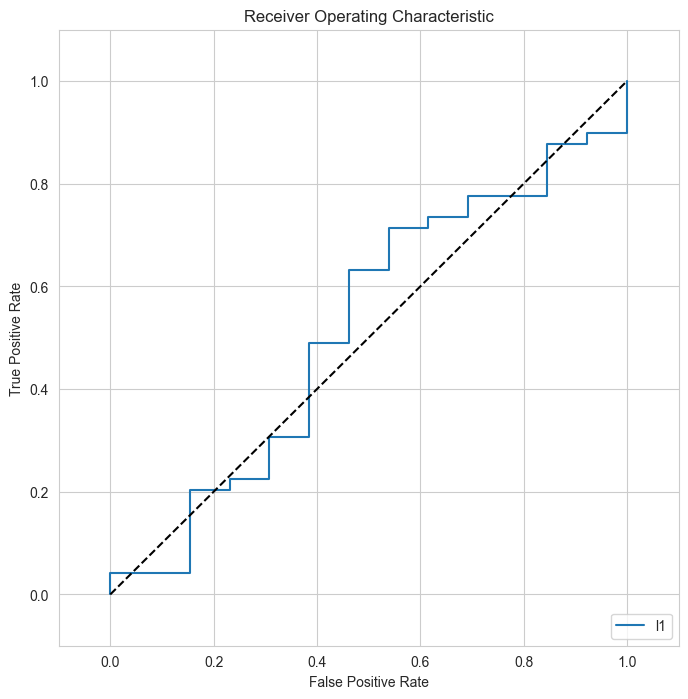

In [125]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [126]:
roc_auc_score(y_train,y_train_pred )

0.9711538461538461

In [127]:
# Calculate AUC for Test
print(auc(fpr, tpr))

0.5164835164835164


# Model 8: Neural Networks

In [128]:
# Neural Networks# Neural 
neural = MLPClassifier(hidden_layer_sizes=40,
                     activation='relu',
                     solver='adam',
                     alpha=0.001,
                     batch_size='auto',
                     max_iter=200,
                     random_state=137,
                     tol=0.0001,
                     early_stopping=False,
                     validation_fraction=0.1,
                     beta_1=0.9,
                     beta_2=0.999,
                     epsilon=1e-08,
                     learning_rate='constant',
                     power_t=0.5,
                     momentum=0.8,
                     nesterovs_momentum=True,
                     shuffle=True,
                     learning_rate_init=0.001)
neural.fit(X_train, y_train)
#Predict Output
predicted = neural.predict(X_test)

neural_score = round(neural.score(X_train, y_train) * 100, 2)
neural_score_test = round(neural.score(X_test, y_test) * 100, 2)
print('Neural Score: \n', neural_score)
print('Neural Test Score: \n', neural_score_test)
print('Accuracy: \n', accuracy_score(y_test, predicted))
print(confusion_matrix(predicted,y_test))
print(classification_report(y_test,predicted))

Neural Score: 
 83.87
Neural Test Score: 
 79.03
Accuracy: 
 0.7903225806451613
[[ 2  2]
 [11 47]]
              precision    recall  f1-score   support

           0       0.50      0.15      0.24        13
           1       0.81      0.96      0.88        49

    accuracy                           0.79        62
   macro avg       0.66      0.56      0.56        62
weighted avg       0.75      0.79      0.74        62



In [129]:
## Predict Train results
y_train_pred = neural.predict(X_train)

In [130]:
## Predict Test results
y_pred = neural.predict(X_test)

In [131]:
y_pred_proba = neural.predict_proba(X_test)[:,1]

In [132]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

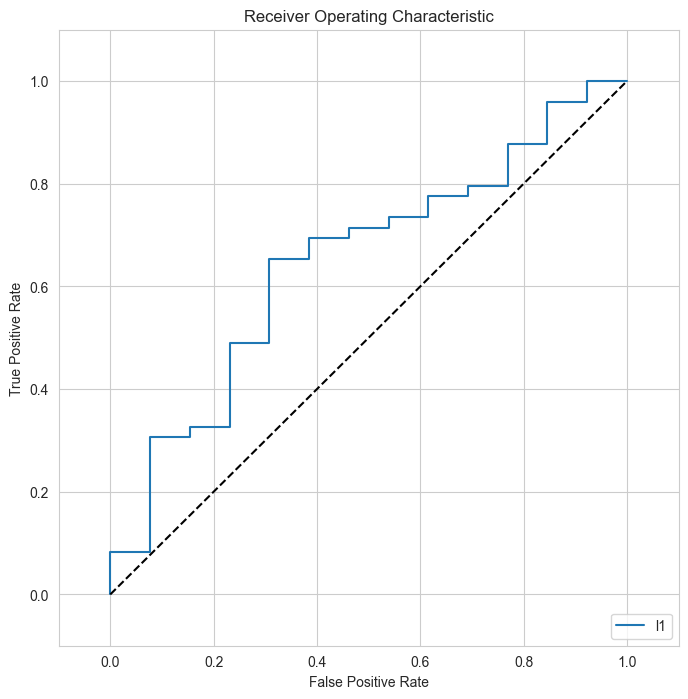

In [133]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [134]:
roc_auc_score(y_train,y_train_pred )

0.6507064364207221

In [135]:
# Calculate AUC for Test
print(auc(fpr, tpr))

0.6467817896389325


# Additionally Added Model: AdaBoostClassifier Model

In [136]:
from sklearn.ensemble import AdaBoostClassifier
# Create AdaBoost Classifier object
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)

In [137]:
# Train the model
adaboost_model.fit(X_train, y_train)
# Predict Train results
y_train_pred_adaboost = adaboost_model.predict(X_train)

In [138]:
# Predict Test results
y_pred_adaboost = adaboost_model.predict(X_test)
y_pred_proba_adaboost = adaboost_model.predict_proba(X_test)[:, 1]

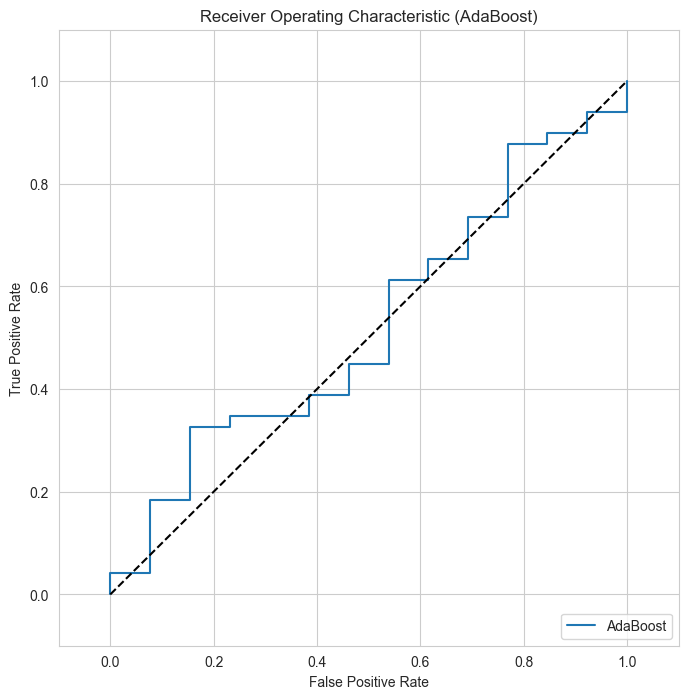

In [139]:
# Calculate ROC curve from y_test and pred
fpr_adaboost, tpr_adaboost, thresholds_adaboost = roc_curve(y_test, y_pred_proba_adaboost)

# Plot the ROC curve
fig = plt.figure(figsize=(8, 8))
plt.title('Receiver Operating Characteristic (AdaBoost)')
# Plot ROC curve
plt.plot(fpr_adaboost, tpr_adaboost, label='AdaBoost')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0, 1], [0, 1], 'k--')

# Axes limits and labels
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [140]:
# Calculate AUC for Train
roc_auc_adaboost_train = roc_auc_score(y_train, y_train_pred_adaboost)

# Calculate AUC for Test
roc_auc_adaboost_test = auc(fpr_adaboost, tpr_adaboost)

print("AUC for AdaBoost (Train):", roc_auc_adaboost_train)
print("AUC for AdaBoost (Test):", roc_auc_adaboost_test)

AUC for AdaBoost (Train): 0.9103218210361068
AUC for AdaBoost (Test): 0.5227629513343799


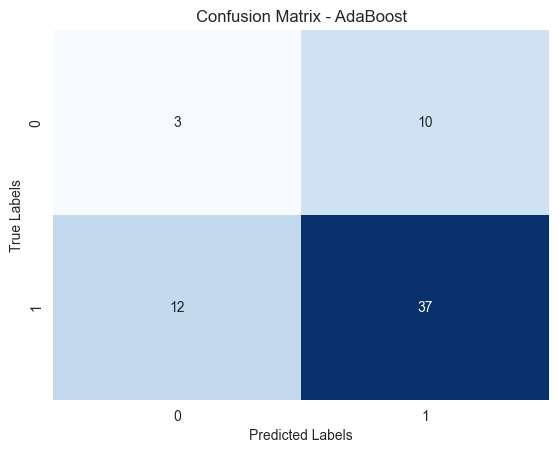

In [141]:
# Confusion matrix for AdaBoost
conf_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)
sns.heatmap(conf_matrix_adaboost, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - AdaBoost')
plt.show()

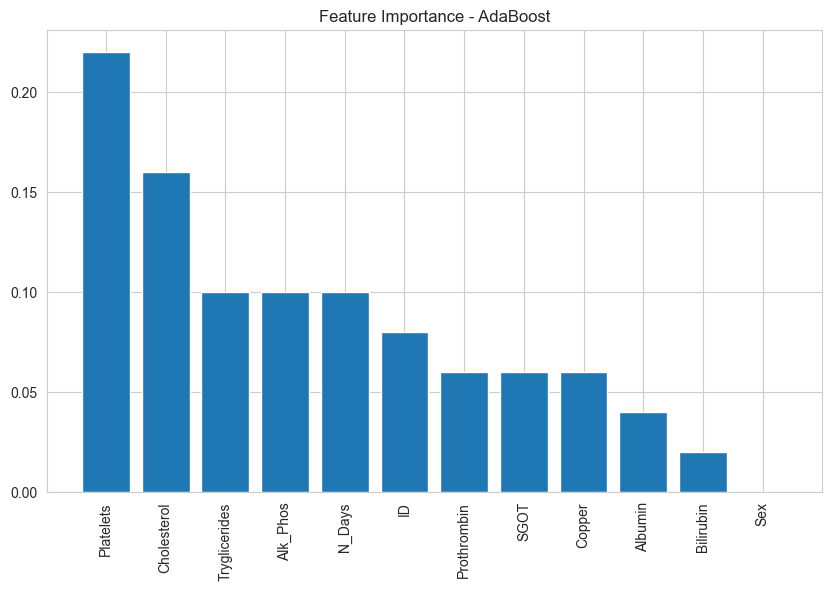

In [142]:
# Feature importance for AdaBoost
feature_importance_adaboost = adaboost_model.feature_importances_

# Sort feature importances in descending order
indices_adaboost = np.argsort(feature_importance_adaboost)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importance_adaboost[indices_adaboost])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices_adaboost], rotation=90)
plt.title('Feature Importance - AdaBoost')
plt.show()

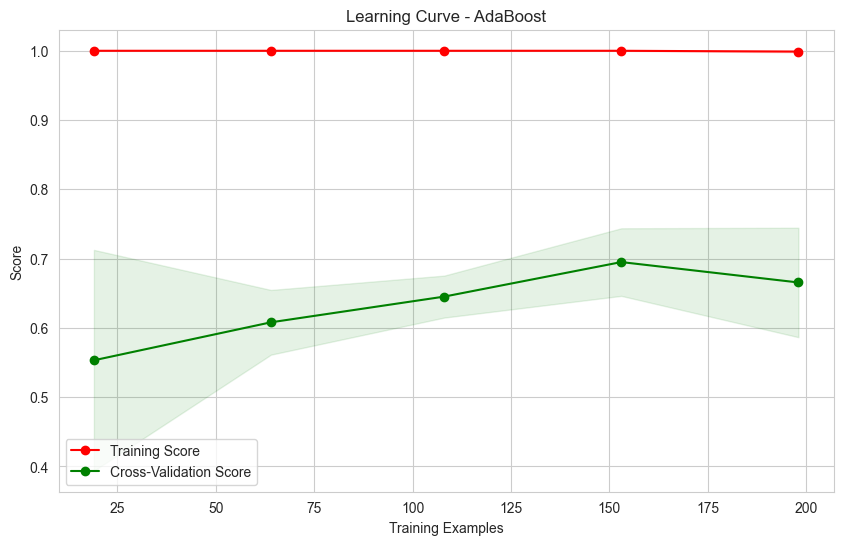

In [143]:
# Learning curve for AdaBoost
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    adaboost_model, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)

# Calculate mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-Validation Score")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve - AdaBoost")
plt.legend(loc="best")
plt.show()

# Additionally Added Model: Support Vector Machine (SVM) classifier

In [144]:
# Import SVM
from sklearn.svm import SVC

# Model-9 Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', probability=True, random_state=123)
svm_model.fit(X_train, y_train)

# Predict Train results
y_train_pred_svm = svm_model.predict(X_train)

# Predict Test results
y_pred_svm = svm_model.predict(X_test)
y_pred_proba_svm = svm_model.predict_proba(X_test)[:, 1]

# Display first 10 predictions
print("Predictions:", y_pred_svm[:10])

Predictions: [1 1 1 1 1 1 1 1 1 1]


In [145]:
# Accuracy for Train and Test
accuracy_train_svm = accuracy_score(y_train, y_train_pred_svm)
accuracy_test_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy - Train:", accuracy_train_svm)
print("Accuracy - Test:", accuracy_test_svm)

Accuracy - Train: 0.7903225806451613
Accuracy - Test: 0.7903225806451613


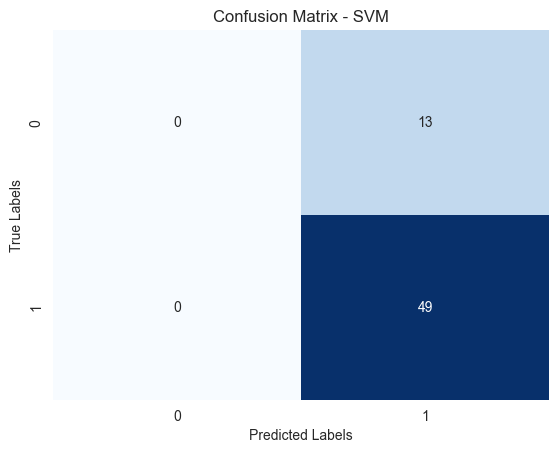

In [146]:
# Confusion Matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - SVM')
plt.show()

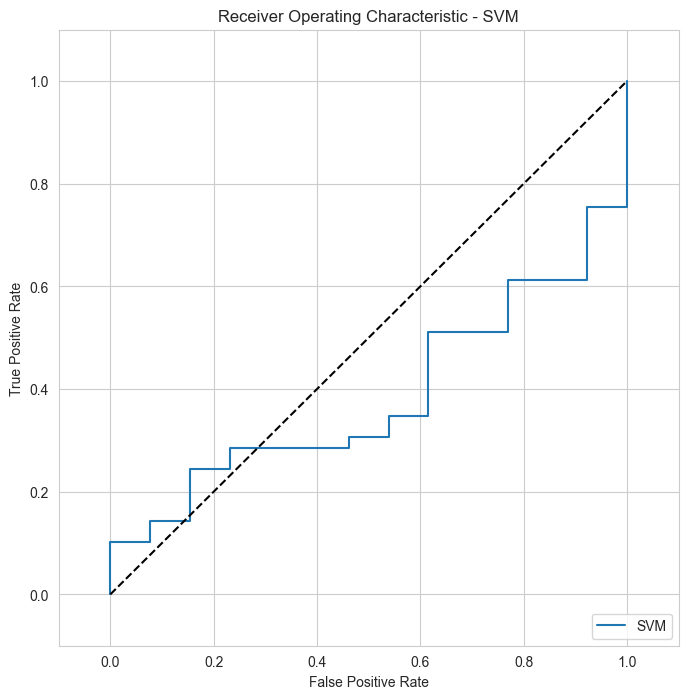

In [147]:
# ROC Curve for SVM
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_proba_svm)
plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic - SVM')
plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [148]:
# AUC for SVM
roc_auc_svm = auc(fpr_svm, tpr_svm)
print("AUC - SVM:", roc_auc_svm)

AUC - SVM: 0.3846153846153846


# Conclusion and Future Direction

In the course of this project, a comprehensive exploration of liver disease diagnosis using machine learning has been undertaken. The results obtained from the proposed method showcase promising strides in leveraging advanced computational techniques for medical diagnostics. However, it's imperative to acknowledge certain limitations in the current approach.

The limitations may encompass challenges in handling diverse patient populations, potential biases in the training data, and the need for further refinement in model interpretability. The accuracy achieved, while notable, leaves room for improvement, especially in scenarios involving nuanced and complex medical conditions.

Looking ahead, future directions for this research could involve expanding the dataset to encompass a broader array of patient demographics and medical histories. Additionally, incorporating explainability features into the model architecture could enhance its clinical utility, fostering trust among healthcare professionals. Exploring ensemble techniques or hybrid models that leverage both traditional diagnostic methods and machine learning algorithms may contribute to more robust and reliable predictions.

Furthermore, addressing the ethical considerations associated with medical AI, such as transparency, privacy, and fairness, will be crucial for the successful integration of these models into real-world clinical settings. This project has laid a foundation for the intersection of machine learning and healthcare, and its evolution will likely involve collaborative efforts between data scientists, healthcare practitioners, and ethicists to ensure responsible and effective deployment in medical diagnostics.

# References:

[1]:  A. N. Arbain and B. Y. P. Balakrishnan, “A comparison of data mining algorithms for liver disease prediction on imbalanced data,” International Journal of Data Science and Analytics, vol. 1, 2019.

[2]:  D. Grissa, D. Nytoft Rasmussen, A. Krag, S. Brunak, and L. Juhl Jensen, “Alcoholic liver disease: a registry view on comorbidities and disease prediction,” PLoS Computational Biology, vol. 16, no. 9, Article ID e1008244, 2020.